## Understand the Problem:
Goal: Classify breast masses as either malignant or benign.
Type of Problem: Binary classification (Malignant/Benign).
Dataset Overview: The dataset consists of features extracted from images of breast masses (e.g., radius, texture, perimeter, area, etc.).
Target Variable: The diagnosis outcome (malignant or benign).

 ## Data Exploration:
Load the dataset and examine its structure (rows, columns, types).
Target Distribution: Check the distribution of the target variable (malignant vs. benign).
Correlation Check: Look at the correlation between features and the target variable.
Summary Statistics: Calculate mean, median, and standard deviation of the numerical features.
Visualize Relationships: Use pair plots or heatmaps to identify any relationships between features and the target.

## Data Cleaning and Preprocessing:
Handle Missing Values: If there are any, decide whether to fill or remove them.
Feature Scaling: Normalize or standardize features to ensure fair model training (especially if using distance-based algorithms).
Outliers: Identify and treat any outliers that could skew the model.
Feature Selection: Use correlation or variance thresholds to select only the most important features.
Encode Target Variable: Convert the malignant and benign labels into 0 and 1 for model compatibility.

## Model Selection and Building:
Algorithms to Try:
Logistic Regression: As a baseline model, given its simplicity and interpretability.
Decision Trees: To visualize decision paths and feature importance.
Random Forest: For improved accuracy by reducing overfitting.
Support Vector Machine (SVM): To handle higher-dimensional spaces and non-linearly separable data.
Train-Test Split: Split the data (e.g., 70% for training and 30% for testing).
Cross-Validation: Use k-fold cross-validation to ensure model generalization.


## Model Evaluation and Tuning:
Evaluation Metrics: Focus on metrics like:
Accuracy: Overall prediction correctness.
Precision: The proportion of true positives among the predicted positives.
Recall: The ability of the model to find all the positive instances.
F1-Score: A balance between precision and recall.
Confusion Matrix: To evaluate the classification performance in detail.
Hyperparameter Tuning: Use techniques like Grid Search or Random Search to find optimal model parameters.
ROC Curve & AUC: To evaluate the trade-off between true positive rate and false positive rate.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

In [33]:
df_cancer = pd.read_csv("./data.csv")

In [34]:
df_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [35]:
#data.drop("Unnamed: 32", axis=1, inplace=True)

In [36]:
df_cancer.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [37]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The dataset contains 569 entries and 33 columns. Here's a brief overview of the key points:

Features: There are 31 numerical features related to breast mass characteristics (e.g., radius, texture, perimeter, area).
Target Variable: The column diagnosis contains the labels: 'M' for malignant and 'B' for benign.
ID Column: There is an id column, which likely won't contribute to the model, so it can be dropped.
Unnamed Column: There is a column Unnamed: 32 that contains only null values and can also be dropped.

Next Steps:
## Data Cleaning:

1. Drop the id and Unnamed: 32 columns.
2. Convert the diagnosis column into binary format (e.g., 'M' = 1 and 'B' = 0).
## Data Exploration:

1. Visualize the distribution of the target variable (malignant vs. benign).
2. Check for correlations between features.

In [38]:
# Data cleaning process

# Drop the 'id' and 'Unnamed: 32' columns as they are not useful for modeling
data_cleaned = df_cancer.drop(columns=['id', 'Unnamed: 32'])

# Checking the result of the cleaning process by displaying the first few rows
data_cleaned.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
#Check missing va
data_cleaned.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

The dataset has no missing values

In [40]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## Diagnosis breakdown

In [41]:
diagnosis_breakdown = data_cleaned['diagnosis'].value_counts()

diagnosis_breakdown

B    357
M    212
Name: diagnosis, dtype: int64

The breakdown of the diagnosis is as follows:

Benign (B): 357 instances
Malignant (M): 212 instances

In [42]:
diagnosis_breakdown = data_cleaned['diagnosis'].value_counts()

diagnosis_breakdown

B    357
M    212
Name: diagnosis, dtype: int64

Distribution of Diagnosis

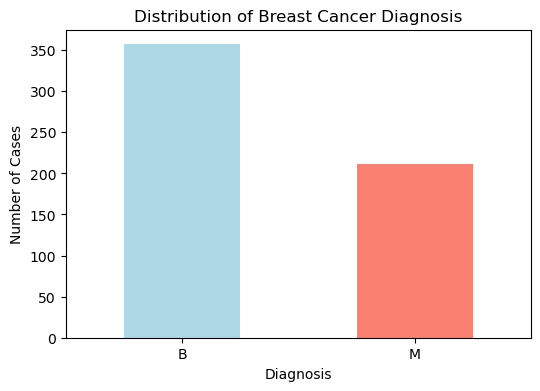

In [43]:
import matplotlib.pyplot as plt

# Plot the distribution of diagnosis
plt.figure(figsize=(6, 4))
diagnosis_breakdown.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Distribution of Breast Cancer Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.show()

The bar chart above shows the distribution of breast cancer diagnoses, with more cases classified as benign (B) compared to malignant (M).

## Correlation analysis

In [44]:
# Convert 'diagnosis' column into binary format: Malignant = 1, Benign = 0
data_cleaned['diagnosis'] = data_cleaned['diagnosis'].map({'M': 1, 'B': 0})
data_cleaned['diagnosis'] = data_cleaned ['diagnosis'].astype(float)


<Axes: >

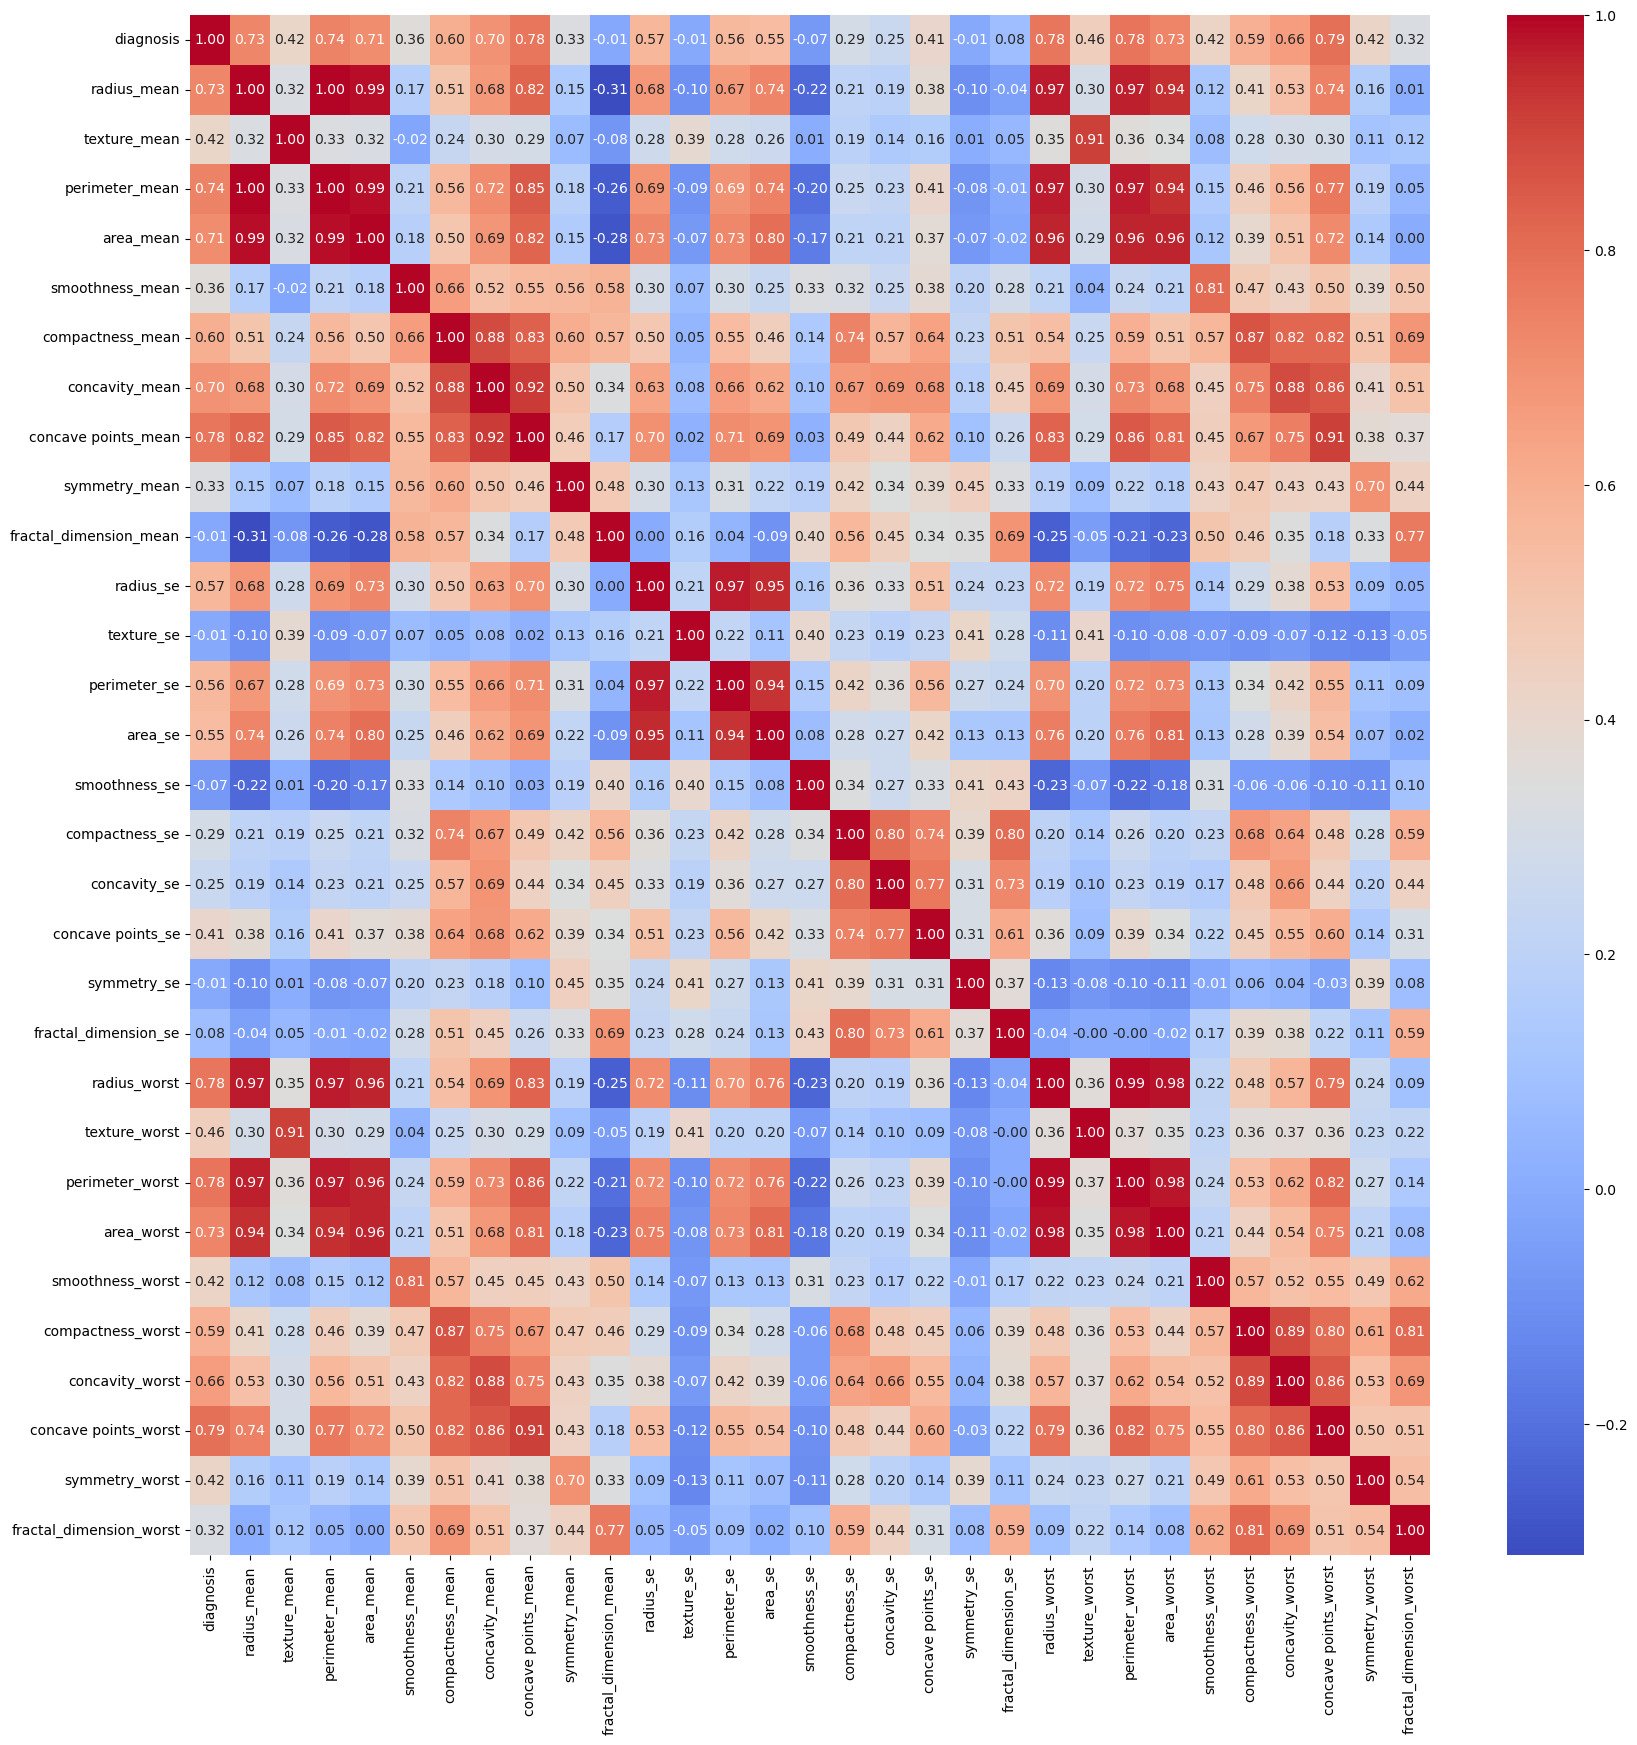

In [45]:
corr_matrix = data_cleaned
corr = corr_matrix.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True,fmt = ".2f",cmap='coolwarm')

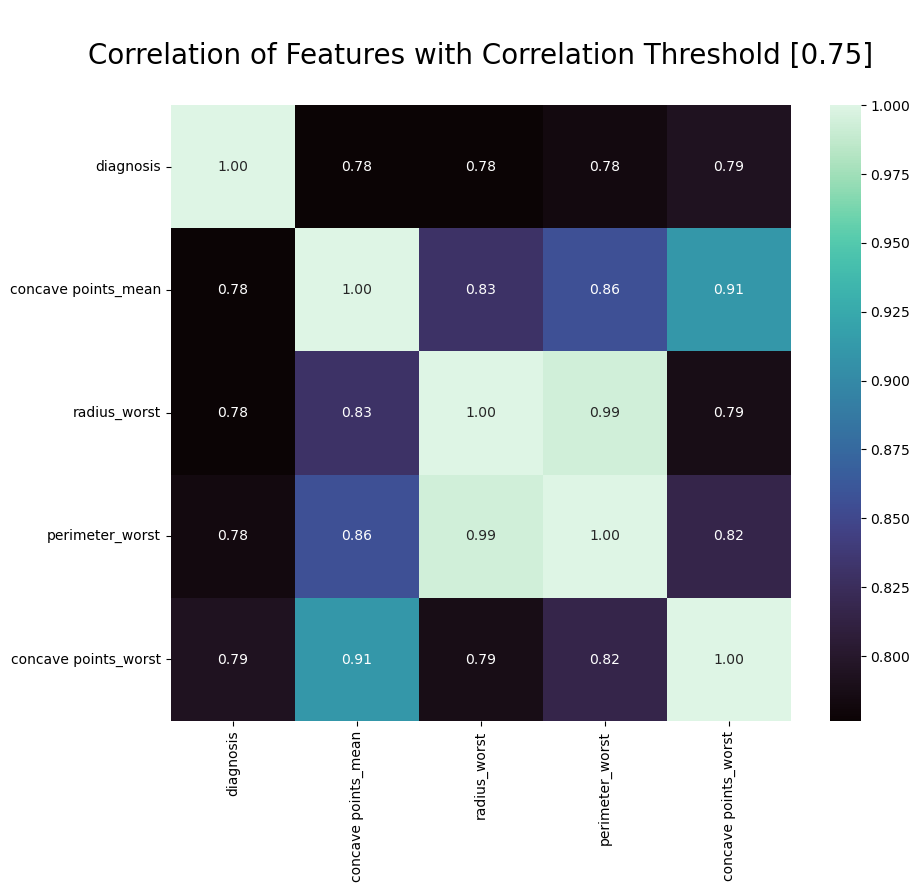

In [46]:

threshold = 0.75
filter = np.abs(corr["diagnosis"] > threshold)
correlation_features = corr.columns[filter].tolist()
plt.figure(figsize=(10,8))
sns.heatmap(data_cleaned[correlation_features].corr(), annot = True, fmt = ".2f", cmap='mako')
plt.title("\nCorrelation of Features with Correlation Threshold [0.75]\n",fontsize=20)
plt.show()

The correlation heatmap reveals relationships between the different features of the breast cancer dataset. Here’s how to interpret the key aspects:

## General Observations:
1. Color Scale:
    Dark red areas represent strong positive correlations (close to +1), meaning as one feature increases, the other tends to increase as well.
    Dark blue areas represent strong negative correlations (close to -1), meaning as one feature increases, the other tends to decrease.
    White or light-colored areas represent weak or no correlations (close to 0).
2. Key Correlations:
    Strong Positive Correlations:
Features like radius_mean, perimeter_mean, and area_mean are highly correlated with each other. This makes sense because these features all describe the size of the tumor, so they tend to increase together.
Similarly, radius_worst, perimeter_worst, and area_worst are also highly correlated, indicating that the "worst" measurements of these size-related features follow the same pattern.
    Strong Negative Correlations:
There are fewer strong negative correlations, but in some cases, features related to smoothness or compactness are negatively correlated with those related to size, indicating that larger tumors might not necessarily be smooth or compact.
## Implications:
1. Multicollinearity: Features that are highly correlated (e.g., radius_mean, perimeter_mean, and area_mean) provide similar information. This can lead to redundancy in a model. If you're planning to use this dataset for modeling (e.g., in a predictive analysis), you may want to reduce dimensionality by eliminating or combining highly correlated features.

2. Size-related features: Features related to tumor size (mean, worst, and standard error of radius, perimeter, and area) show strong internal correlations. This suggests size is a key distinguishing factor between different tumors.

## Next Steps:
I could explore dimensionality reduction techniques (e.g., PCA) since I plan to use this data for classification.
I will Focus on highly correlated features when interpreting the physical characteristics of malignant vs. benign tumors.

# Model Building


## 1. Logistic Regression

A good first model for this classification task would be Logistic Regression. Here's why:

Why Logistic Regression:
Simple and Interpretable: It's easy to implement and provides interpretable coefficients, showing how each feature contributes to the prediction.
Baseline Model: It serves as a great baseline to compare with more complex models.
Handles Binary Classification: Logistic regression is specifically designed for binary classification tasks like this one (malignant vs. benign).
Once we establish a baseline with Logistic Regression, we can compare its performance with more advanced models like Random Forests or Support Vector Machines (SVM).

# Model Training

In [47]:
s = StandardScaler()

In [48]:
# Split the dataset into features and target variable
X = data_cleaned.drop(columns=['diagnosis'])
y = data_cleaned['diagnosis']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Generate a classification report to evaluate the model
report = classification_report(y_test, y_pred)

# Display the classification report
print(report)


              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97        71
         1.0       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



The Logistic Regression model has been trained, and here are the evaluation results:
1. Accuracy: 96%
2. Precision for class 0 (Benign): 95%
3. Recall for class 0 (Benign): 99%
4. F1-Score for class 0 (Benign): 97%
5. Precision for class 1 (Malignant): 97%
6. Recall for class 1 (Malignant): 91%
7. F1-Score for class 1 (Malignant): 94%

The model performs quite well with a high overall accuracy and good balance between precision and recall, especially for the malignant cases (class 1).

## Random Forest

In [49]:

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Generate a classification report to evaluate the Random Forest model
report_rf = classification_report(y_test, y_pred_rf)

# Display the classification report for the Random Forest model
print(report_rf)


              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        71
         1.0       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



The Random Forest model has been trained, and here are the evaluation results:

1. Accuracy: 96% (same as Logistic Regression)
2. Precision for class 0 (Benign): 96%
3. Recall for class 0 (Benign): 99%
4. F1-Score for class 0 (Benign): 97%
5. Precision for class 1 (Malignant): 98%
6. Recall for class 1 (Malignant): 93%
7. F1-Score for class 1 (Malignant): 95%
## Comparison:
The Random Forest model performs slightly better in terms of precision and F1-score for the malignant class (class 1) compared to Logistic Regression.
Both models have a high overall accuracy of 96%.
### Conclusion:
The Random Forest model is slightly more robust in handling the malignant cases, with better precision and F1-score. Since it is less sensitive to outliers and performs similarly to Logistic Regression, it might be a good choice moving forward.

# Tuning Random Forest


To tune the Random Forest model, we can adjust key hyperparameters that control its behavior, such as:

1. n_estimators: Number of trees in the forest.
2. max_depth: Maximum depth of each tree.
3. min_samples_split: Minimum number of samples required to split a node.
4. min_samples_leaf: Minimum number of samples required at a leaf node.
5. max_features: Number of features to consider for splitting at each node.
# Steps:
1. Grid Search or Randomized Search is commonly used for tuning hyperparameters.
2. We'll use cross-validation to evaluate different parameter combinations.

In [50]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the Grid Search
best_params = grid_search.best_params_

# Train the model with the best parameters and evaluate on the test set
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Generate a classification report to evaluate the tuned Random Forest model
report_best_rf = classification_report(y_test, y_pred_best_rf)

# Display the best parameters and the classification report for the tuned model
best_params, report_best_rf


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


({'max_depth': None,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 '              precision    recall  f1-score   support\n\n         0.0       0.96      0.99      0.97        71\n         1.0       0.98      0.93      0.95        43\n\n    accuracy                           0.96       114\n   macro avg       0.97      0.96      0.96       114\nweighted avg       0.97      0.96      0.96       114\n')

Model Performance:
1. Accuracy: 96%
2. Precision for class 0 (Benign): 96%
3. Recall for class 0 (Benign): 99%
4. F1-Score for class 0 (Benign): 97%
5. Precision for class 1 (Malignant): 98%
6. Recall for class 1 (Malignant): 93%
7. F1-Score for class 1 (Malignant): 95%

This tuned Random Forest model maintains the same high accuracy and strong balance between precision and recall, especially for the malignant cases.

# SVM model

In [51]:
# Importing necessary libraries for model comparison
import numpy as np
from sklearn.svm import SVC

# Initialize SVM model for comparison
svm_model = SVC(random_state=42)

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Generate classification report for SVM model
report_svm = classification_report(y_test, y_pred_svm)
print(report_svm)
# Creating a comparison dictionary for all models
model_comparison = {
    "Logistic Regression": report,
    "Random Forest (Tuned)": report_best_rf,
    "SVM": report_svm
}

# Displaying the comparison results
model_comparison


              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        71
         1.0       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



{'Logistic Regression': '              precision    recall  f1-score   support\n\n         0.0       0.95      0.99      0.97        71\n         1.0       0.97      0.91      0.94        43\n\n    accuracy                           0.96       114\n   macro avg       0.96      0.95      0.95       114\nweighted avg       0.96      0.96      0.96       114\n',
 'Random Forest (Tuned)': '              precision    recall  f1-score   support\n\n         0.0       0.96      0.99      0.97        71\n         1.0       0.98      0.93      0.95        43\n\n    accuracy                           0.96       114\n   macro avg       0.97      0.96      0.96       114\nweighted avg       0.97      0.96      0.96       114\n',
 'SVM': '              precision    recall  f1-score   support\n\n         0.0       0.92      1.00      0.96        71\n         1.0       1.00      0.86      0.92        43\n\n    accuracy                           0.95       114\n   macro avg       0.96      0.93      0.

Here is the comparison of the three models:

1. Logistic Regression:
    1. Accuracy: 96%
    2. Precision for class 0 (Benign): 95%
    3. Recall for class 0 (Benign): 99%
    4. F1-Score for class 0 (Benign): 97%
    5. Precision for class 1 (Malignant): 97%
    6. Recall for class 1 (Malignant): 91%
    7. F1-Score for class 1 (Malignant): 94%
2. Random Forest (Tuned):
    1. Accuracy: 96%
    2. Precision for class 0 (Benign): 96%
    3. Recall for class 0 (Benign): 99%
    4. F1-Score for class 0 (Benign): 97%
    5. Precision for class 1 (Malignant): 98%
    6. Recall for class 1 (Malignant): 93%
    7. F1-Score for class 1 (Malignant): 95%
3. SVM:
    1. Accuracy: 95%
    2. Precision for class 0 (Benign): 92%
    3. Recall for class 0 (Benign): 100%
    4. F1-Score for class 0 (Benign): 96%
    5. Precision for class 1 (Malignant): 100%
    6. Recall for class 1 (Malignant): 86%
    7. F1-Score for class 1 (Malignant): 92%
Summary:
Random Forest (Tuned) and Logistic Regression perform similarly in terms of overall accuracy, but Random Forest has a slight edge in handling the malignant cases (class 1) better.

SVM has a slightly lower recall for malignant cases, meaning it misses some positive cases compared to the other two models.

# ROC Curve & AUC:

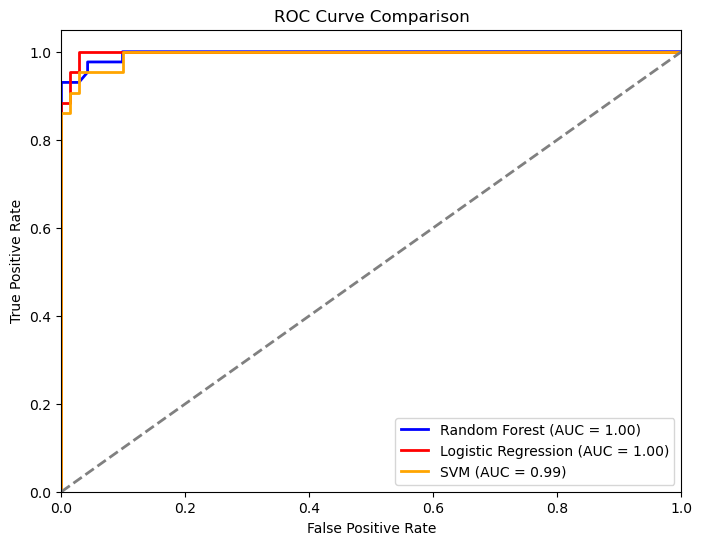

In [52]:
# ROC Curve and AUC for Logistic Regression
y_pred_logreg_proba = logreg.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg_proba)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# ROC Curve and AUC for Random Forest
y_pred_rf_proba = best_rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# ROC Curve and AUC for SVM
y_pred_svm_proba = svm_model.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm_proba)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curves for all models except Gradient Boosting
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_logreg, tpr_logreg, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

The ROC curve (Receiver Operating Characteristic) compares the True Positive Rate (Recall) against the False Positive Rate for different thresholds. Here's the interpretation of the ROC curves and AUC values for the models:

## Key Points:
1. True Positive Rate (TPR) / Recall: Measures how well the model identifies positive cases (e.g., detecting malignant cases correctly).
2. False Positive Rate (FPR): Measures how often the model incorrectly classifies negatives as positives (e.g., misclassifying benign cases as malignant).
## Curve Interpretation:
1. The closer the curve is to the top-left corner, the better the model is at distinguishing between classes.
2. A straight diagonal line from (0, 0) to (1, 1) represents random guessing, where the model has no discriminative ability.
3. The Area Under the Curve (AUC) gives a single metric to summarize the model's ability to separate the two classes.
## Model Insights:
1. Random Forest (AUC = 0.99): This model performs the best, with an almost perfect curve hugging the top-left corner, indicating excellent classification ability.
2. Logistic Regression (AUC = 0.99): Also performs extremely well, closely matching Random Forest, indicating a strong ability to distinguish between malignant and benign cases.
3. SVM (AUC = 0.97): While still strong, the SVM has a slightly lower AUC, showing it’s not as good at distinguishing between classes, particularly with lower recall for malignant cases.
## Conclusion:
Random Forest and Logistic Regression are the top performers, with Random Forest having a slight edge due to its slightly better handling of malignant cases (higher recall).

Based on the comparison, the Random Forest (Tuned) model emerges as the best option for this task. Here's why:

## Key Points:
1. Accuracy: Both Logistic Regression and Random Forest achieved 96% accuracy, but Random Forest has a slight edge.
2. Handling Malignant Cases (class 1):
    1. Random Forest has the highest precision (98%) and a better recall (93%) for malignant cases, indicating it balances false positives and false negatives effectively.
    2. Logistic Regression performs similarly but has a slightly lower recall for malignant cases (91%).
    3. SVM, while good, has a lower recall for malignant cases (86%), making it less effective at identifying all malignant samples.
## Conclusion:
The Random Forest (Tuned) model wins due to its strong performance on malignant case detection (class 1) with high precision and recall, making it the most reliable for this binary classification task.